In [212]:
import numpy as np
import pandas as pd

In [213]:
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')

In [214]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [215]:
df.shape

(5572, 5)

## Data Cleaning

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [217]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [218]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [219]:
#renaming the columns

df=df.rename(columns={'v1':'target', 'v2':'text'})
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [220]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

In [221]:
df['target']=encoder.fit_transform(df['target']) #ham: 0, spam:1

In [222]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [223]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [224]:
#duplicate values
df.duplicated().sum()

403

In [225]:
#drop duplicates
df = df.drop_duplicates(keep='first')

In [226]:
df.duplicated().sum()

0

In [227]:
df.shape

(5169, 2)

## EDA

In [228]:
df['target'].value_counts() #biased data

0    4516
1     653
Name: target, dtype: int64

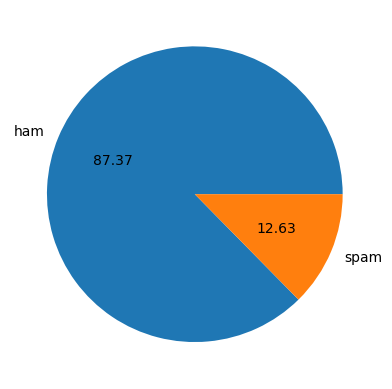

In [229]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [230]:
import nltk

In [231]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\niyan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [232]:
df['num_characters']=df['text'].apply(len)
df['num_characters']

C:\Users\niyan\AppData\Local\Temp\ipykernel_18640\1094631176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 5169, dtype: int64

In [233]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [234]:
#numbers of words

df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\niyan\AppData\Local\Temp\ipykernel_18640\3039839630.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [235]:
df['num_words']

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: num_words, Length: 5169, dtype: int64

In [236]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [237]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\niyan\AppData\Local\Temp\ipykernel_18640\754723001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [238]:
df['num_sentences']

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: num_sentences, Length: 5169, dtype: int64

In [239]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [240]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [241]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [242]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [243]:
import seaborn as sns

<Figure size 1200x600 with 0 Axes>

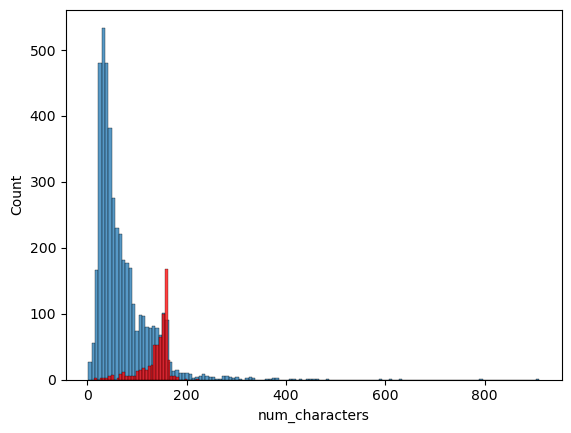

<Figure size 1200x600 with 0 Axes>

In [244]:
#ham
sns.histplot(df[df['target']==0]['num_characters'])
#spam
sns.histplot(df[df['target']==1]['num_characters'], color='red')

plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

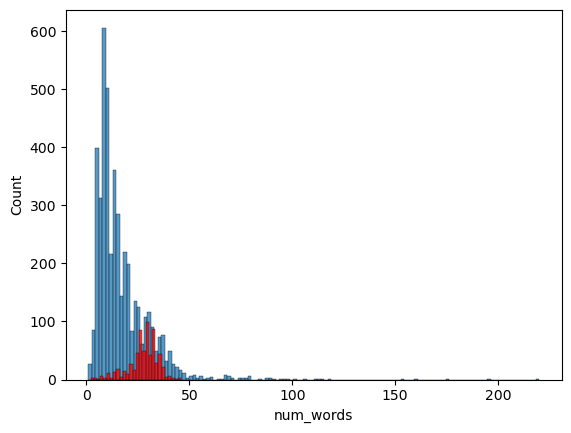

<Figure size 1200x600 with 0 Axes>

In [245]:
#ham
sns.histplot(df[df['target']==0]['num_words'])
#spam
sns.histplot(df[df['target']==1]['num_words'], color='red')

plt.figure(figsize=(12,6))

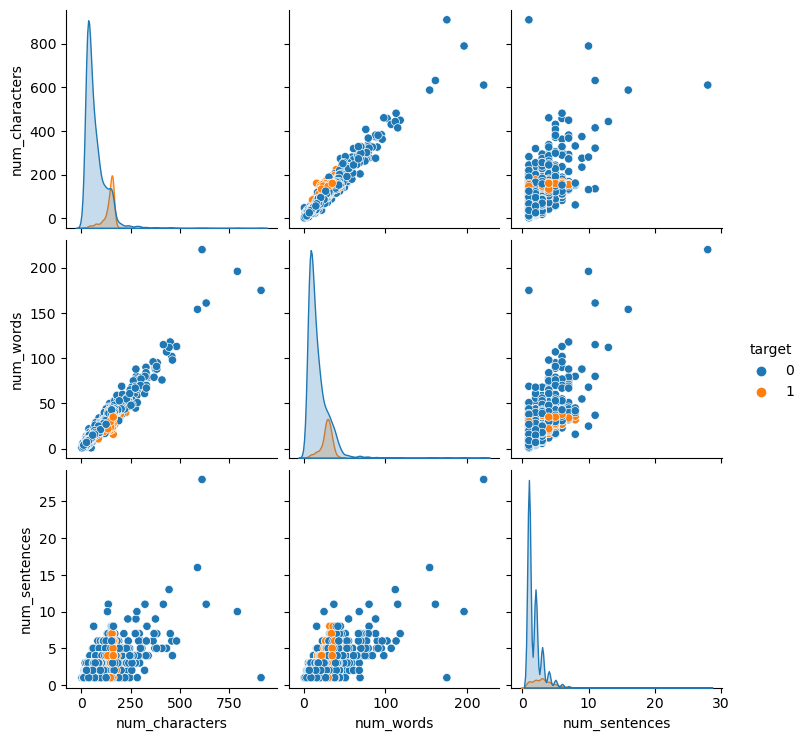

In [246]:
sns.pairplot(df, hue='target')

<AxesSubplot: >

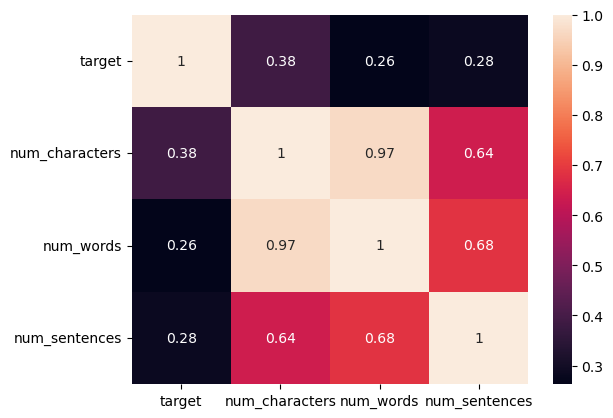

In [247]:
sns.heatmap(df.corr(),annot=True)

## Preprocessing

In [248]:
#text preprocessing 
# Lower case
# Tokenization
# Removing special characters
# Removing stop words
# stemming

In [249]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer()

import string

In [250]:
def text_transform(text):
    # Lower case
    text=text.lower()
    # Tokenization
    text=nltk.word_tokenize(text)
    # Removing special characters
    y=[]
    for i in text:
        if i.isalnum():
         y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [251]:
text_transform("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [252]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [253]:
df['tranformed_text']= df['text'].apply(text_transform)

C:\Users\niyan\AppData\Local\Temp\ipykernel_18640\2297048272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tranformed_text']= df['text'].apply(text_transform)


In [254]:
df.head()

,target,text,num_characters,num_words,num_sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [255]:
#WORD CLOUD FOR SPAM

In [256]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500, min_font_size=10,background_color='white')

In [257]:
spam_wc = wc.generate(df[df['target']==1]['tranformed_text'].str.cat(sep=" "))

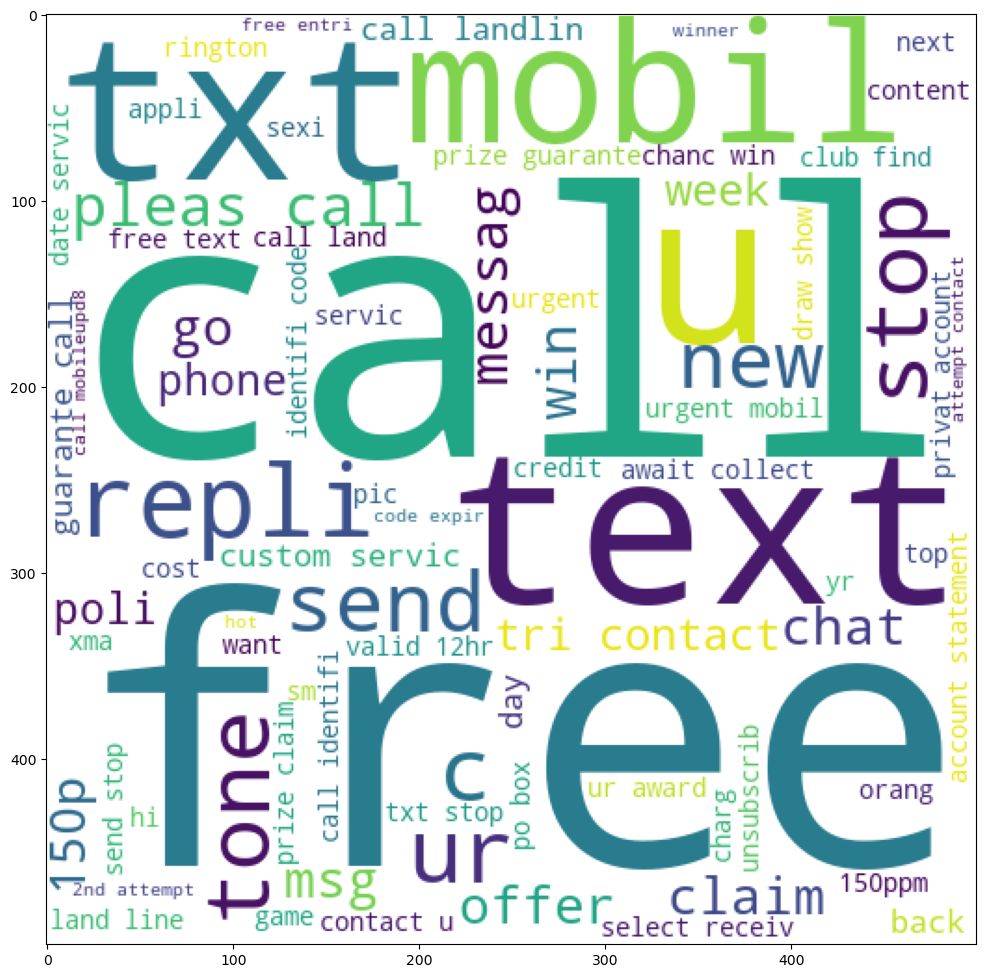

In [258]:
plt.figure(figsize=(12,15))
plt.imshow(spam_wc)

In [259]:
ham_wc = wc.generate(df[df['target']==0]['tranformed_text'].str.cat(sep=" "))

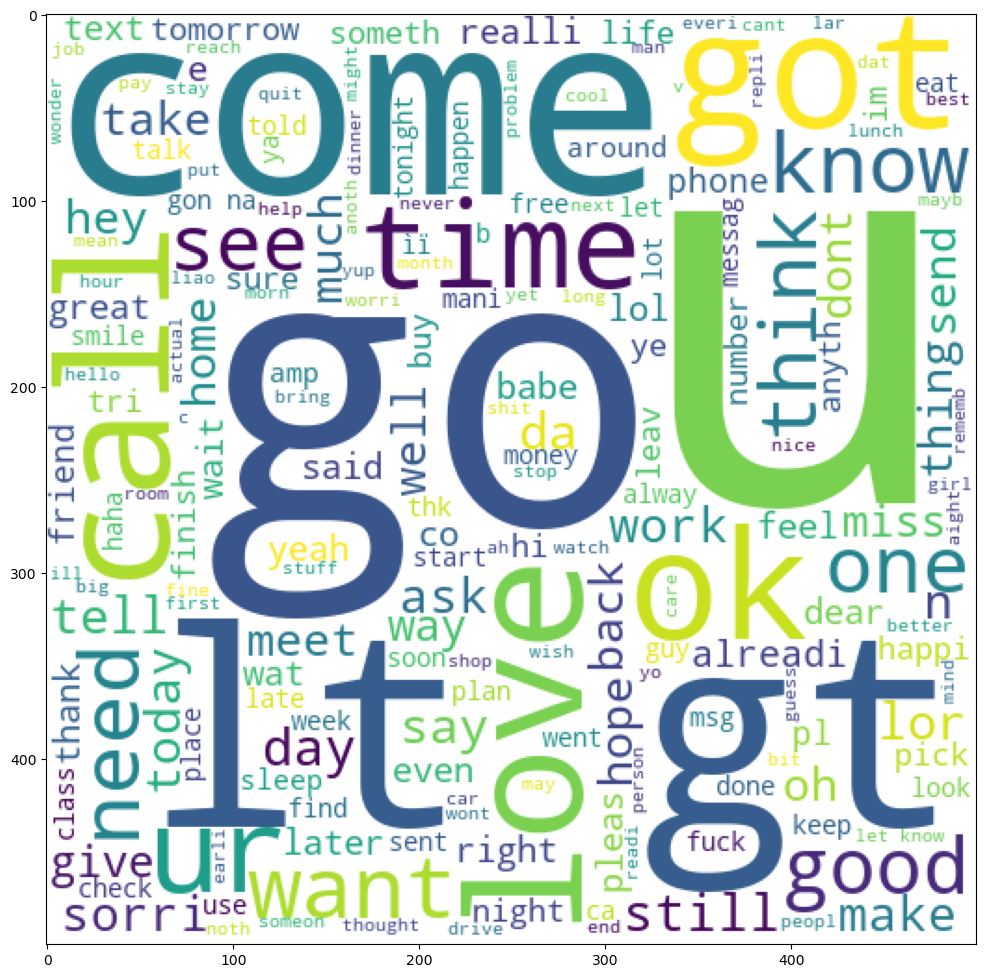

In [260]:
plt.figure(figsize=(12,15))
plt.imshow(spam_wc)

In [261]:
spam_corpus=[]
for msg in df[df['target']==1]['tranformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [262]:
len(spam_corpus)

9939

In [263]:
ham_corpus=[]
for msg in df[df['target']==0]['tranformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [264]:
len(ham_corpus)

35394

## Model Building

In [265]:
#Naive Bias - best for textual data

In [266]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [267]:
X=tfidf.fit_transform(df['tranformed_text']).toarray()

In [268]:
X.shape

(5169, 3000)

In [269]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [270]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

In [271]:
# X = scaler.fit_transform(X)

In [272]:
y = df['target'].values

In [273]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [274]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=2)

In [275]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [276]:
gnb= GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [277]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [278]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [279]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [280]:
#tfidf --> mnb

In [281]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor


In [282]:
lrc = LogisticRegression(solver='liblinear',penalty='l1')
svc = SVC(kernel='sigmoid',gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
bc  = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
# xgb = XGBRegressor(n_estimators=50, random_state=2)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)


In [283]:
clf = {
    'lrc': lrc, 
    'svc': svc,
    'mnb': mnb,
    'dtc': dtc,
    'knc': knc,
    'rfc': rfc,
    'abc': abc,
    'bc':  bc,
    'etc': etc,
    'gbc': gbc,
#     'xgb': xgb
}

In [284]:
def train_classifier(clf, X_train, y_train, X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy, precision

In [285]:
train_classifier(svc, X_train, y_train, X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [286]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clf.items():
    
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test,y_test)
    
    print("Name",name)
    print("accuracy_score", current_accuracy)
    print("precision_score:", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

Name lrc
accuracy_score 0.9584139264990329
precision_score: 0.9702970297029703
Name svc
accuracy_score 0.9758220502901354
precision_score: 0.9747899159663865
Name mnb
accuracy_score 0.9709864603481625
precision_score: 1.0
Name dtc
accuracy_score 0.9303675048355899
precision_score: 0.8173076923076923


C:\Users\niyan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Name knc
accuracy_score 0.9052224371373307
precision_score: 1.0
Name rfc
accuracy_score 0.9748549323017408
precision_score: 0.9827586206896551
Name abc
accuracy_score 0.960348162475822
precision_score: 0.9292035398230089
Name bc
accuracy_score 0.9574468085106383
precision_score: 0.8671875
Name etc
accuracy_score 0.9748549323017408
precision_score: 0.9745762711864406
Name gbc
accuracy_score 0.9477756286266924
precision_score: 0.92


In [287]:
# Improvements
#max_feature = 3000 in tfidf
#scale X --> accuacy imporove but precision decrease

In [288]:
# Deploy

#text tranform
#vectorize
#model apply

In [289]:
import pickle 
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))